In [7]:
%matplotlib inline
import pandas as pd
import matplotlib as plot
import numpy as np

In [12]:
def prepareData(data):
    # create boolean gender column
    data['Gender'] = data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

    # median age for each gender (rows) and each class (columns)
    median_ages = np.zeros((2,3))

    for i in range(0, 2):
        for j in range(0, 3):
            median_ages[i,j] = data[(data['Gender'] == i) & \
                                  (data['Pclass'] == j+1)]['Age'].dropna().median()
            
    # lets add some new useful columns
    data['AgeFill'] = data['Age']

    # fill in median ages
    for i in range(0, 2):
        for j in range(0, 3):
            data.loc[ (data.Age.isnull()) & (data.Gender == i) & (data.Pclass == j+1),\
                    'AgeFill'] = median_ages[i,j]

    data['AgeIsNull'] = pd.isnull(data.Age).astype(int)
    data['FamilySize'] = data['SibSp'] + data['Parch']
    data['Age*Class'] = data.AgeFill * data.Pclass
    data.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis=1, inplace=True) 

In [13]:
train_df = pd.read_csv('data/train.csv', header = 0)
prepareData(train_df)

test_df = pd.read_csv('data/test.csv', header = 0)
prepareData(test_df)

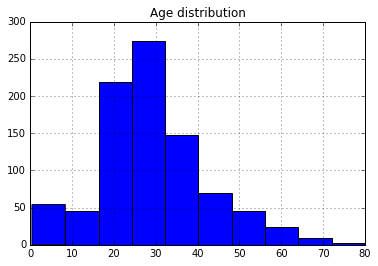

In [14]:
histogram = train_df['AgeFill'].hist()
histogram.set_title('Age distribution')

In [15]:
train_df.head(10)

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,1,0,3,1,0,7.2500,1,22,0,1,66
1,2,1,1,1,0,71.2833,0,38,0,1,38
2,3,1,3,0,0,7.9250,0,26,0,0,78
3,4,1,1,1,0,53.1000,0,35,0,1,35
4,5,0,3,0,0,8.0500,1,35,0,0,105
5,6,0,3,0,0,8.4583,1,25,1,0,75
6,7,0,1,0,0,51.8625,1,54,0,0,54
7,8,0,3,3,1,21.0750,1,2,0,4,6
8,9,1,3,0,2,11.1333,0,27,0,2,81
9,10,1,2,1,0,30.0708,0,14,0,1,28


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe518edc7b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe518e83588>]], dtype=object)

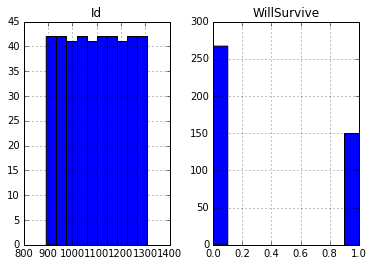

In [39]:
import warnings

# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# disable nonfatal warnings
warnings.filterwarnings('ignore')

train_data = train_df.drop('PassengerId', axis=1).values
test_data = test_df.drop('PassengerId', axis=1).dropna().values


# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(train_data[0::,1::],train_data[0::,0])

# Take the same decision trees and run it on the test data
output = forest.predict(test_data).astype(int)

ids = test_df['PassengerId'].values

pd.DataFrame(list(zip(ids, output)), columns=['Id', 'WillSurvive']).hist()